In [1]:
import pandas as pd
import numpy as np

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 30 20:15:38 2021
@author: Usuario
"""

import pandas as pd



def find_header(df):
    #Get row and column of #Fecha on the data frame
    result=df.isin(["Fecha"])   
    column_date=result.any()
    column_date=column_date[column_date==True].index[0]
    row_date=result[column_date][result[column_date]==True].index[0]
    
    #On row date get the columns where are the hours [0:23]
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, in case text above header
    hours_str = list(map(str, hours))
    #List of Combined hours in format integers and string
    hours_comb=hours+hours_str
    #Find by combined hours format
    result=df.iloc[row_date,:].isin(hours_comb) 
    #Get column names for the searched hours 
    columns_hours=list(result[result==True].index)
    
    
    #List of columns wich contains the interested header of the dataframe
    columns=list([column_date])+columns_hours
    #From dataframe only take such columns
    df=df[columns]
    #Set new columns header
    new_columns=["Fecha"]+hours_str
    df.columns=new_columns

    #Get label of parameter downloaded and assing to a entire new column
    #df['file'] = df.iloc[0][0]
    
    #Drop row where the header was found and rows before it
    drop_rows=[i for i in range(0,row_date+1)]
    df = df.drop(drop_rows).reset_index(drop=True)
    
    #Change format of elements in df that could be in string to numeric in hours column
    df[hours_str] = df[hours_str].apply(pd.to_numeric)
    
    
    #Delate nan values on Fecha column
    df.dropna(subset = ["Fecha"], inplace=True)    
    
    #Change format of Fecha column to datetime format
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    
    return df


def read_dataFile(path):
    df = pd.read_excel(path)

    df=find_header(df)

    return df

#http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_1995.xlsx?

temp = pd.DataFrame({'Fecha' : []})

for year in range(1995, 2020):
    filePath = f'http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_{year}.xlsx?'
    new_data = read_dataFile(filePath)
    temp = pd.concat([temp, new_data])
    

def melt_df(df):
    #Hours
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, column names
    hours_str = list(map(str, hours))
    #Melt original dataframe
    df_melt=pd.melt(df,id_vars=["Fecha"],value_vars=hours_str,var_name='Hour', value_name='Precio_Bolsa')
    #Convert string to float
    df_melt["Hour"]=pd.to_numeric(df_melt["Hour"])
    
    #Add hours to the date which only had considered the day
    df_melt["Fecha"]=df_melt["Fecha"]+pd.to_timedelta(df_melt["Hour"],unit='H')
    #Order de data
    df_melt.sort_values(by=['Fecha'], inplace=True, ascending=False) #Most recent first
    #Reset index
    df_melt=df_melt.reset_index(drop=True)
    
    return df_melt

temp_melt=melt_df(temp)

In [106]:
lista = list(range(2010,2022))
lista

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [107]:
temp1 = pd.DataFrame({'Fecha' : []})
for year in lista:
    filePath = f'Precio_Bolsa_Nacional_($kwh)_{year}.xlsx'
    new_data = pd.read_excel(filePath)
    new_data = find_header(new_data)
    temp1 = temp1.append(new_data)
temp1

,Fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2010-01-01,124.687267,124.687267,124.280267,124.687267,124.687267,115.844267,114.687267,114.687267,114.687267,114.687267,114.687267,115.844267,115.844267,115.844267,115.844267,115.844267,114.687267,124.687267,128.687267,129.687267,128.687267,124.687267,124.687267,124.687267
1,2010-01-02,114.503340,112.503340,112.503340,112.503340,112.503340,112.503340,112.503340,114.311340,114.503340,115.503340,115.503340,115.503340,115.503340,115.503340,115.503340,115.503340,114.503340,114.503340,145.503340,150.503340,130.503340,130.503340,115.503340,115.503340
2,2010-01-03,112.790267,112.790267,112.790267,112.687267,112.687267,112.687267,97.687267,112.687267,113.495267,113.495267,113.495267,113.687267,114.687267,119.687267,113.495267,113.687267,113.495267,113.687267,129.687267,199.687267,199.687267,119.687267,114.687267,114.687267
3,2010-01-04,112.587267,112.541267,112.541267,112.587267,112.587267,112.587267,112.587267,113.495267,113.587267,113.587267,115.687267,115.687267,115.687267,115.687267,115.687267,115.687267,115.687267,113.687267,130.687267,305.687267,130.687267,129.687267,113.587267,112.587267
4,2010-01-05,113.587267,113.587267,113.587267,113.587267,113.587267,114.687267,114.687267,114.687267,117.687267,117.687267,117.687267,117.687267,117.687267,117.687267,117.687267,117.687267,117.687267,117.687267,129.687267,209.687267,117.687267,117.687267,117.687267,114.687267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-06-27,78.271761,78.271761,78.271761,78.271761,78.271761,78.271761,78.271761,78.271761,78.271761,78.272761,81.982761,81.982761,81.982761,81.982761,81.982761,81.982761,78.272761,78.272761,83.271761,83.971761,83.271761,83.271761,83.271761,81.982761
178,2021-06-28,83.783535,83.783535,83.783535,79.718535,83.783535,83.783535,84.717535,84.717535,84.810535,84.810535,85.417535,85.417535,85.417535,85.417535,85.417535,85.417535,85.417535,84.810535,85.417535,85.417535,85.417535,85.417535,84.810535,84.810535
179,2021-06-29,79.220424,79.220424,79.220424,79.220424,79.220424,83.300424,83.300424,84.220424,84.920424,84.920424,84.920424,84.921424,84.921424,84.921424,84.921424,84.921424,84.921424,84.920424,84.921424,84.921424,84.921424,84.920424,84.920424,84.220424
180,2021-06-30,84.691301,84.691301,84.691301,84.691301,84.691301,85.604301,85.604301,85.611301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.311301,86.312301,86.311301,86.311301,86.311301,85.611301


In [122]:
Precio_Bolsa_2010_2021_1 = melt_df(temp1)
Precio_Bolsa_2010_2021_1 = Precio_Bolsa_2010_2021_1.set_index('Fecha')
Precio_Bolsa_2010_2021 = Precio_Bolsa_2010_2021_1[['Precio_Bolsa']]
Precio_Bolsa_2010_2021.sort_values(by='Fecha')

,Precio_Bolsa
Fecha,
2010-01-01 00:00:00,124.687267
2010-01-01 01:00:00,124.687267
2010-01-01 02:00:00,124.280267
2010-01-01 03:00:00,124.687267
2010-01-01 04:00:00,124.687267
...,...
2021-07-01 19:00:00,87.687207
2021-07-01 20:00:00,87.687207
2021-07-01 21:00:00,87.687207


In [126]:
Precio_Bolsa_2010_2021['Year'] = Precio_Bolsa_2010_2021.index.year
Precio_Bolsa_2010_2021['Month'] = Precio_Bolsa_2010_2021.index.month
Precio_Bolsa_2010_2021['Weekday Name'] = Precio_Bolsa_2010_2021.index.day_name()
Precio_Bolsa_2010_2021['Hour'] = Precio_Bolsa_2010_2021.index.hour
Precio_Bolsa_2010_2021

,Precio_Bolsa,Year,Month,Weekday Name,Hour
Fecha,,,,,
2021-07-01 23:00:00,86.896207,2021,7,Thursday,23
2021-07-01 22:00:00,87.000207,2021,7,Thursday,22
2021-07-01 21:00:00,87.687207,2021,7,Thursday,21
2021-07-01 20:00:00,87.687207,2021,7,Thursday,20
2021-07-01 19:00:00,87.687207,2021,7,Thursday,19
...,...,...,...,...,...
2010-01-01 04:00:00,124.687267,2010,1,Friday,4
2010-01-01 03:00:00,124.687267,2010,1,Friday,3
2010-01-01 02:00:00,124.280267,2010,1,Friday,2


In [8]:
from matplotlib import pyplot

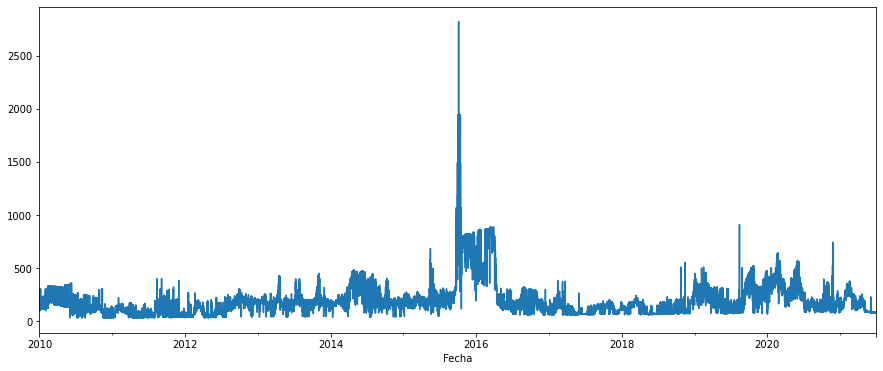

In [128]:
Precio_Bolsa_2010_2021.Precio_Bolsa.plot(figsize=(15, 6))

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

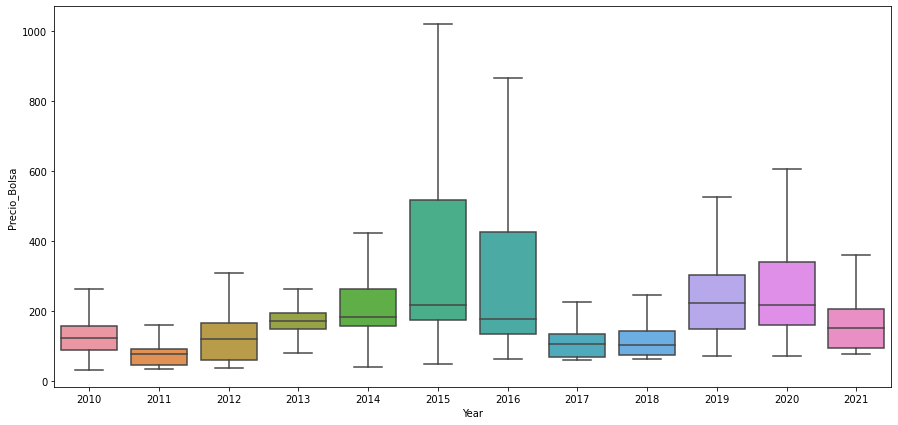

In [154]:
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=Precio_Bolsa_2010_2021, x='Year', y='Precio_Bolsa', showfliers=False)

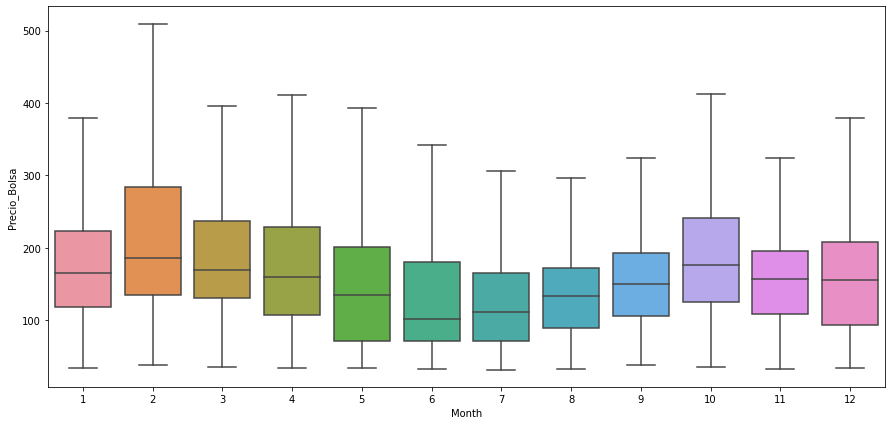

In [133]:
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=Precio_Bolsa_2010_2021, x='Month', y='Precio_Bolsa', showfliers=False)

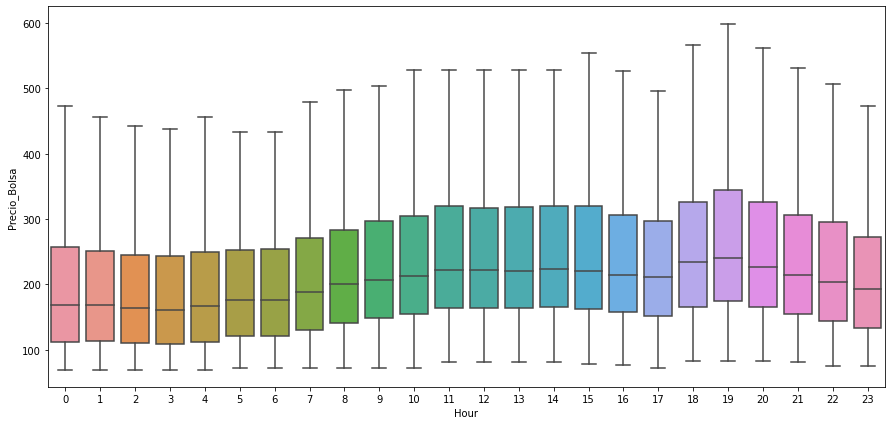

In [153]:
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=time_series_19_21_1, x='Hour', y='Precio_Bolsa', showfliers = False)

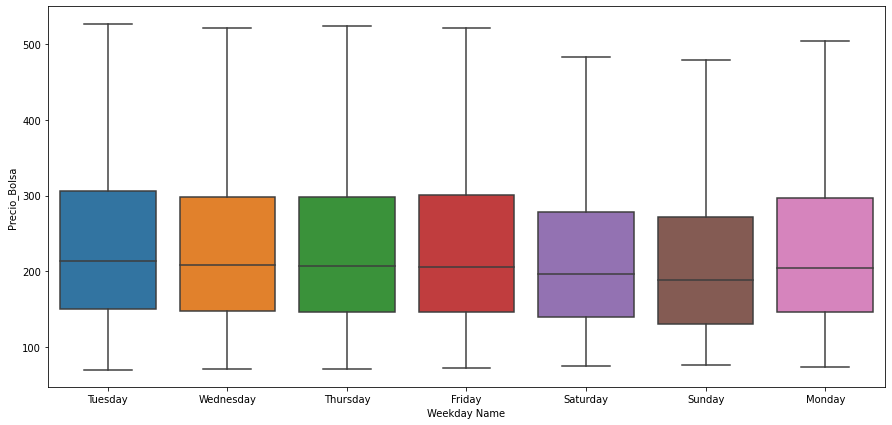

In [135]:
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=time_series_19_21_1, x='Weekday Name', y='Precio_Bolsa', showfliers=False)

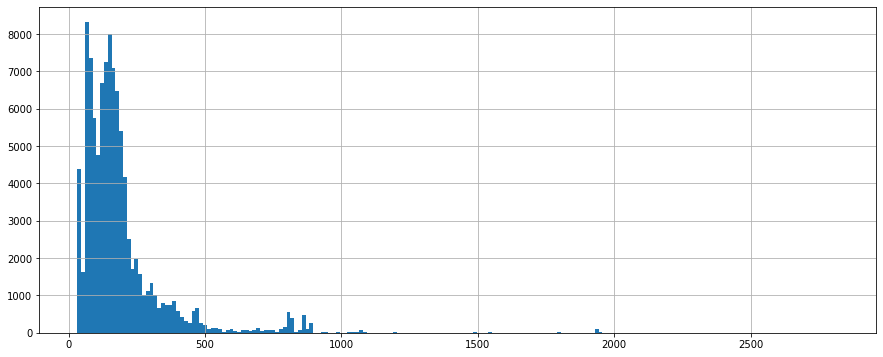

In [147]:
Precio_Bolsa_2010_2021.Precio_Bolsa.hist(figsize=(15, 6), bins = 200)

In [142]:
Precio_Bolsa_2010_2021.Precio_Bolsa.min(), Precio_Bolsa_2010_2021.Precio_Bolsa.mean(), Precio_Bolsa_2010_2021.Precio_Bolsa.max()

(32.024957, 189.69101341292566, 2821.520551)

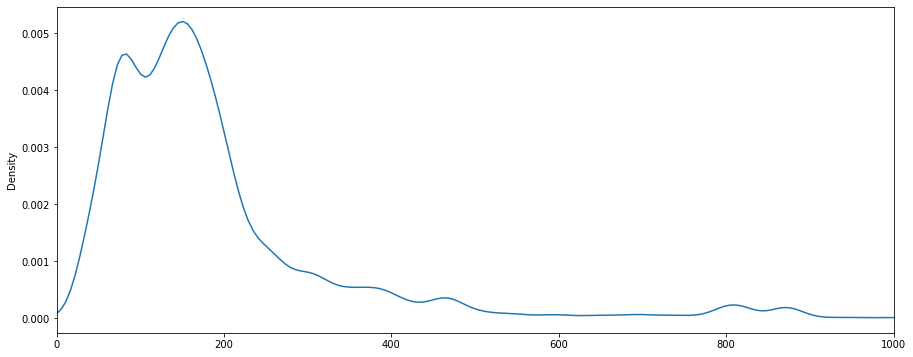

In [146]:
Precio_Bolsa_2010_2021.Precio_Bolsa.plot(kind='kde', figsize=(15, 6), xlim = (0,1000))

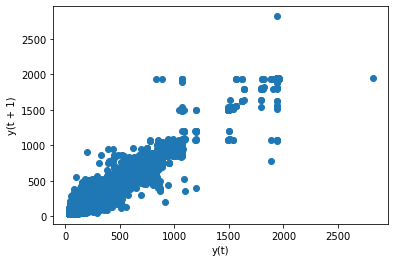

In [148]:
from pandas.plotting import lag_plot
lag_plot(Precio_Bolsa_2010_2021.Precio_Bolsa)

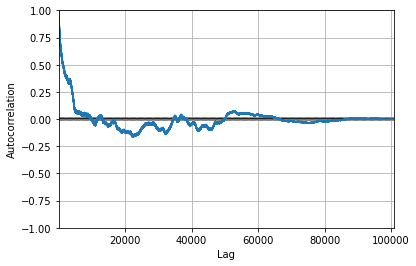

In [149]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Precio_Bolsa_2010_2021.Precio_Bolsa)

In [150]:
Precio_Bolsa_2010_2021.Precio_Bolsa.diff()

Fecha
2021-07-01 23:00:00      NaN
2021-07-01 22:00:00    0.104
2021-07-01 21:00:00    0.687
2021-07-01 20:00:00    0.000
2021-07-01 19:00:00    0.000
                       ...  
2010-01-01 04:00:00    8.843
2010-01-01 03:00:00    0.000
2010-01-01 02:00:00   -0.407
2010-01-01 01:00:00    0.407
2010-01-01 00:00:00    0.000
Name: Precio_Bolsa, Length: 100800, dtype: float64

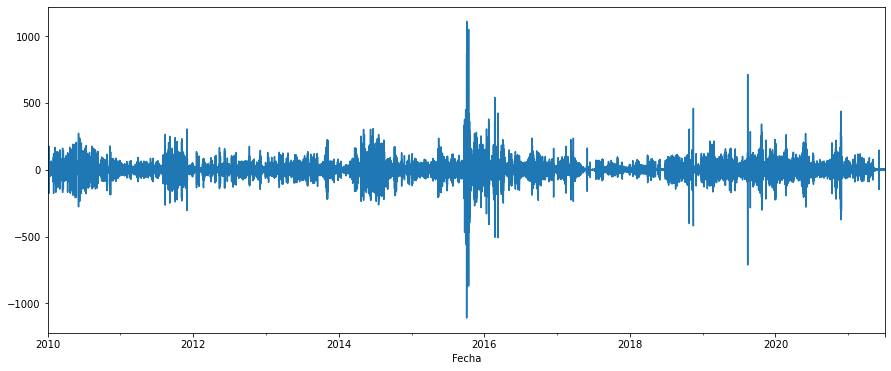

In [156]:
Precio_Bolsa_2010_2021.Precio_Bolsa.diff().plot(figsize=(15, 6))

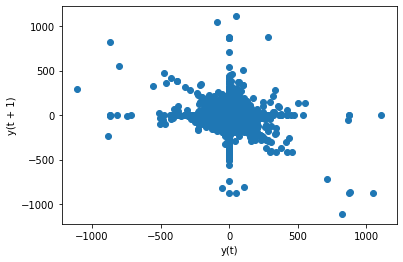

In [160]:
lag_plot(Precio_Bolsa_2010_2021.Precio_Bolsa.diff())

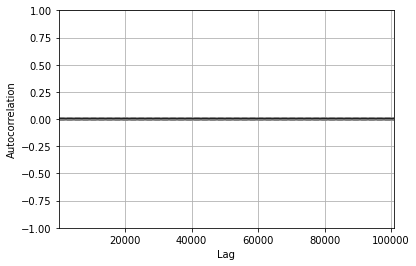

In [161]:
autocorrelation_plot(Precio_Bolsa_2010_2021.Precio_Bolsa.diff())

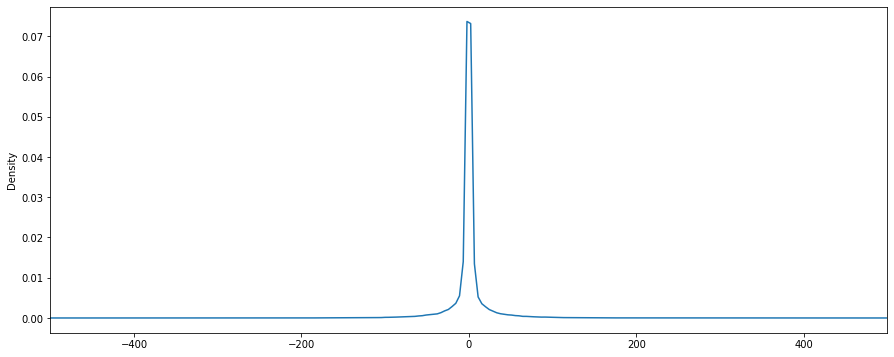

In [163]:
Precio_Bolsa_2010_2021.Precio_Bolsa.diff().plot(kind='kde', figsize=(15, 6), xlim = (-500, 500))

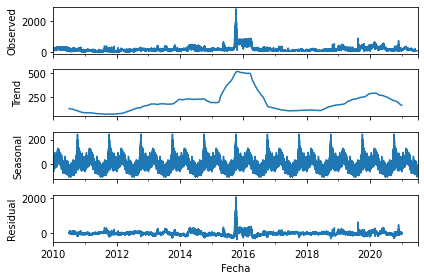

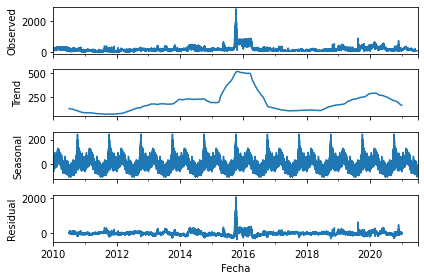

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Precio_Bolsa_2010_2021.Precio_Bolsa, model='additive', freq=24*365).plot()

In [20]:
# ADF Statistic: 
# p-value: 

In [174]:
from statsmodels.tsa.stattools import adfuller
adfuller(Precio_Bolsa_2010_2021.Precio_Bolsa)

(-6.050327057249366,
 1.2821781344688286e-07,
 67,
 100732,
 {'1%': -3.430414919456062,
  '10%': -2.5667852724842737,
  '5%': -2.861568693384786},
 937505.8310033815)

In [176]:
from statsmodels.tsa.stattools import adfuller
adfuller(Precio_Bolsa_2010_2021.Precio_Bolsa.diff()[1:])

(-46.572483953956635,
 0.0,
 68,
 100730,
 {'1%': -3.4304149207450743,
  '10%': -2.5667852727875156,
  '5%': -2.8615686939545033},
 937419.2817916832)

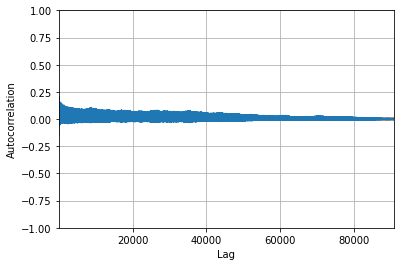

In [185]:
from pandas import concat
from pandas import DataFrame

dataframe = concat([Precio_Bolsa_2010_2021.Precio_Bolsa.shift(+1), Precio_Bolsa_2010_2021.Precio_Bolsa], axis=1)
X = dataframe.values
dataframe.columns = ['t', 't+1']
train_size = int(len(X) * 0.1)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

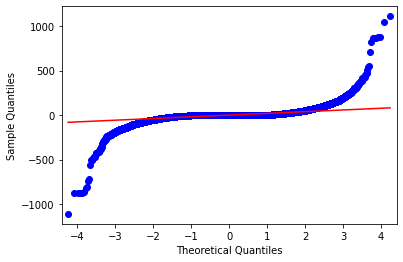

In [188]:
import numpy
from statsmodels.graphics.gofplots import qqplot
values1 = DataFrame(Precio_Bolsa_2010_2021.Precio_Bolsa.values)
dataframe1 = concat([values1.shift(-1), values1], axis=1)
dataframe1.columns = ['t', 't+1']
# split into train and test sets
X1 = dataframe1.values
train_size1 = int(len(X1) * 0.66)
train1, test1 = X1[1:train_size1], X1[train_size1:]
train_X1, train_y1 = train1[:,0], train1[:,1]
test_X1, test_y1 = test1[:,0], test1[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)[:-2]
qqplot(residuals, line='r')
pyplot.show()

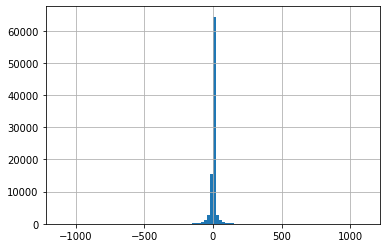

In [189]:
pd.Series(residuals).hist(bins = 100)

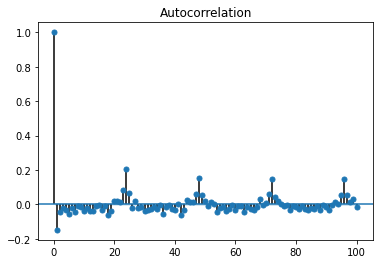

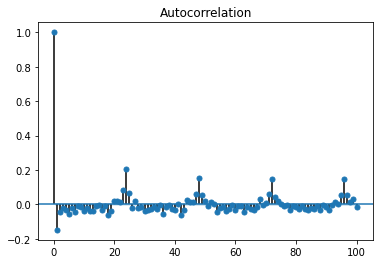

In [191]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=100)

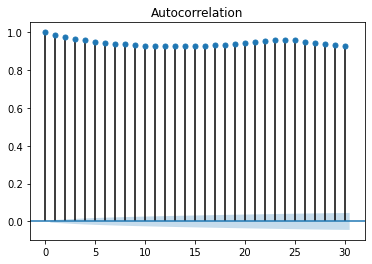

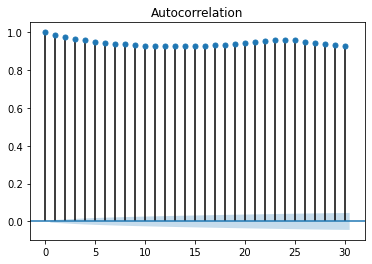

In [192]:
plot_acf(Precio_Bolsa_2010_2021.Precio_Bolsa, lags=30)

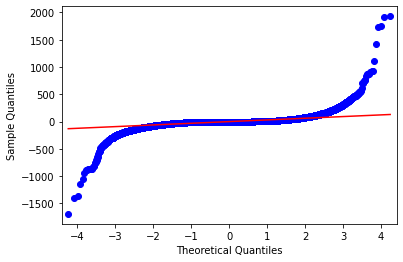

In [193]:
values2= DataFrame(Precio_Bolsa_2010_2021.Precio_Bolsa.diff())
dataframe2 = concat([values2.shift(-1), values2], axis=1).dropna()
dataframe2.columns = ['t', 't+1']
# split into train and test sets
X2 = dataframe2.values
train_size2 = int(len(X1) * 0.1)
train2, test2 = X2[1:train_size2], X2[train_size2:]
train_X2, train_y2 = train2[:,0], train2[:,1]
test_X2, test_y2 = test2[:,0], test2[:,1]
# persistence model
predictions2 = [x for x in test_X2]
# calculate residuals
residuals2 = [test_y2[i]-predictions2[i] for i in range(len(predictions2))]
residuals2 = numpy.array(residuals2)[:-2]
qqplot(residuals2, line='r')
pyplot.show()

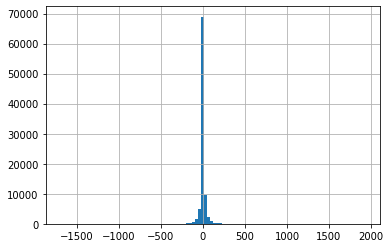

In [194]:
pd.Series(residuals2).hist(bins = 100)

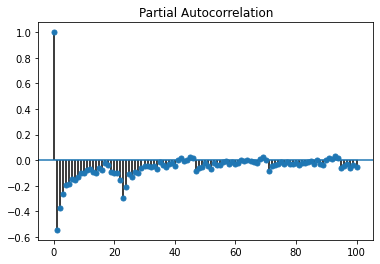

In [199]:
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
plot_pacf(residuals2, lags=100, ax=pyplot.gca())
pyplot.show()

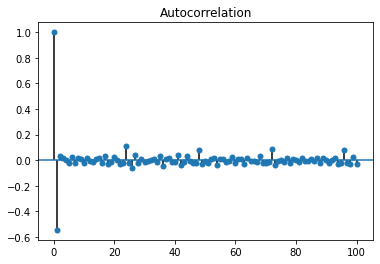

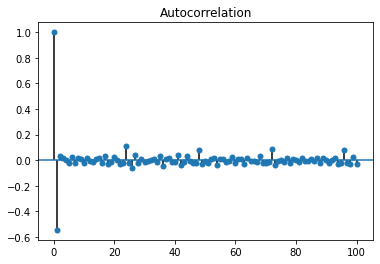

In [201]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals2, lags=100)

In [202]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Precio_Bolsa   No. Observations:               100799
Model:                     ARMA(1, 0)   Log Likelihood             -480125.840
Method:                       css-mle   S.D. of innovations             28.340
Date:                Sat, 03 Jul 2021   AIC                         960257.681
Time:                        23:29:03   BIC                         960286.243
Sample:                    07-01-2021   HQIC                        960266.346
                         - 01-01-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0004      0.078      0.005      0.996      -0.152       0.153
ar.L1.Precio_Bolsa    -0.1445      0.003    -46.350      0.000      -0.151      -0.138
                    

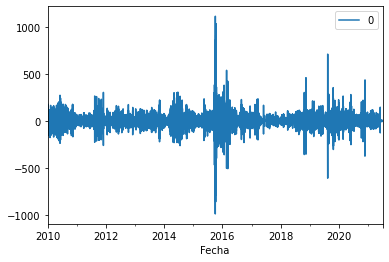

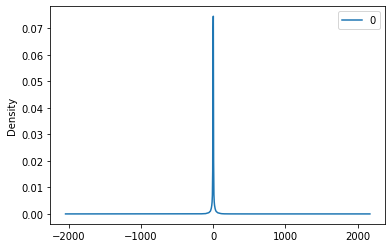

                   0
count  100799.000000
mean        0.000003
std        28.339788
min      -991.374080
25%        -1.189382
50%        -0.000426
75%         0.806681
max      1117.222397


In [205]:
# fit model
model = ARIMA(Precio_Bolsa_2010_2021.Precio_Bolsa.diff()[1:], order=(1,0,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Precio_Bolsa   No. Observations:               100800
Model:                     ARMA(1, 1)   Log Likelihood             -479712.110
Method:                       css-mle   S.D. of innovations             28.222
Date:                Sat, 03 Jul 2021   AIC                         959432.220
Time:                        23:43:10   BIC                         959470.304
Sample:                    07-01-2021   HQIC                        959443.773
                         - 01-01-2010                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                189.6910      7.371     25.734      0.000     175.244     204.138
ar.L1.Precio_Bolsa     0.9899      0.000   2182.685      0.000       0.989       0.991
ma.L1.Precio_Bolsa  

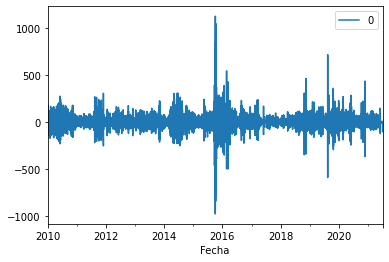

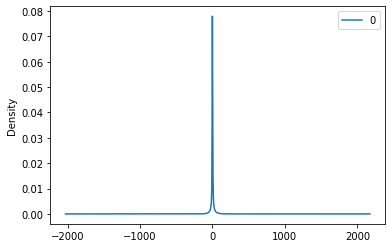

                   0
count  100800.000000
mean       -0.000569
std        28.223678
min      -977.542269
25%        -2.180882
50%        -0.671513
75%         2.155613
max      1122.862231


In [215]:
# fit model
model = ARIMA(Precio_Bolsa_2010_2021.Precio_Bolsa, order=(1,0,1))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())